CS4001/4042 Assignment 1, Part B, Q1
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
!pip install pytorch_tabular[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


> Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

# TODO: Enter your code here

train_df = df[df["year"] <= 2019]
val_df = df[df["year"] == 2020]
test_df = df[df["year"] == 2021]

print(train_df["year"].value_counts(), "\n")
print(val_df["year"].value_counts(), "\n")
print(test_df["year"].value_counts())

2019    22168
2018    21552
2017    20337
Name: year, dtype: int64 

2020    23313
Name: year, dtype: int64 

2021    29057
Name: year, dtype: int64


> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [4]:
# TODO: Enter your code here

#setting up our DataConfig
data_config = DataConfig(
    target=["resale_price"],
    continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"],
)


#setting up TrainerConfig
trainer_config = TrainerConfig(
    auto_lr_find = True,
    batch_size=1024,
    max_epochs=50,
  )


#setting up CategoryEmbeddingModelConfig
model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers=50,  #single hidden layer with 50 neurons
)


#setting up OptimizerConfig
optimizer_config = OptimizerConfig(
    optimizer="Adam",
  )


#creating our model
tabular_model = TabularModel(
    data_config=data_config,
    model_config = model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

tabular_model.fit(train = train_df, validation = val_df)

2023-10-02 02:29:04,253 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-10-02 02:29:04,305 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-10-02 02:29:04,315 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
2023-10-02 02:29:04,552 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: CategoryEmbeddingModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: CategoryEmbeddingModel
2023-10-02 02:29:04,594 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
/usr/local/lib/python3.10/dist-packages/pytorch_lightning

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_mean_squared_error', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.5754399373371567
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_ef55bf08-3396-4c7b-a305-5bf4b3d89e00.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_ef55bf08-3396-4c7b-a305-5bf4b3d89e00.ckpt
2023-10-02 

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-10-02 02:30:04,440 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-10-02 02:30:04,445 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(


In [5]:
pred_df = tabular_model.predict(test = test_df)
y = pred_df["resale_price"]
pred = pred_df["resale_price_prediction"]

#calculating rmse
rmse = np.sqrt(mean_squared_error(y, pred))
print("RMSE: ", rmse)

#calculating R-squared
r_squared = r2_score(y, pred)
print("R-squared: ", r_squared)

Output()

RMSE:  76696.91659962252
R-squared:  0.7776188068029297


> Report the test RMSE error and the test R2 value that you obtained.



RMSE: 76696.91659962252, R-squared: 0.7776188068029297.

> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [6]:
# TODO: Enter your code here
pred_df["Absolute_loss"] = abs(y-pred)
sorted_df = pred_df.sort_values("Absolute_loss", ascending=False)


#giving the top 25 test samples with largest errors
top25 = sorted_df[0:25]
top25

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,resale_price_prediction,Absolute_loss
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,3.646865e+05,415313.46875
90957,6,2021,BUKIT BATOK,288A BUKIT BATOK STREET 25,Bukit Batok,1.292540,10.763777,0.016807,0.000217,"EXECUTIVE, Apartment",75.583333,144.0,10 TO 12,968000.0,6.144984e+05,353501.62500
112128,12,2021,TAMPINES,156 TAMPINES STREET 12,Tampines,0.370873,12.479752,0.033613,0.000229,"EXECUTIVE, Maisonette",61.750000,148.0,01 TO 03,998000.0,6.555938e+05,342406.25000
90608,12,2021,BISHAN,273B BISHAN STREET 24,Bishan,0.776182,6.297489,0.033613,0.015854,"5 ROOM, DBSS",88.833333,120.0,37 TO 39,1360000.0,1.020589e+06,339411.37500
106192,12,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,6.359388e+05,332061.18750
91871,6,2021,BUKIT MERAH,17 TIONG BAHRU ROAD,Tiong Bahru,0.693391,2.058774,0.016807,0.047782,"3 ROOM, Standard",50.583333,88.0,01 TO 03,680888.0,3.583568e+05,322531.21875
93825,8,2021,CENTRAL AREA,4 TANJONG PAGAR PLAZA,Tanjong Pagar,0.451637,2.594828,0.016807,0.103876,"5 ROOM, Adjoined flat",54.583333,118.0,16 TO 18,938000.0,6.179542e+05,320045.75000
92504,12,2021,BUKIT MERAH,49 KIM PONG ROAD,Tiong Bahru,0.468378,2.365532,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,695000.0,3.760023e+05,318997.68750
105695,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,6.124678e+05,317532.25000
90432,8,2021,BISHAN,275A BISHAN STREET 24,Bishan,0.827889,6.370404,0.033613,0.015854,"5 ROOM, DBSS",88.916667,120.0,25 TO 27,1280000.0,9.629781e+05,317021.87500


(array([1.0414e+04, 5.0355e+04, 5.0892e+04, 2.7271e+04, 1.2802e+04,
        5.9200e+03, 1.4290e+03, 3.3400e+02, 1.1900e+02, 1.7000e+01]),
 array([ 140000.,  276000.,  412000.,  548000.,  684000.,  820000.,
         956000., 1092000., 1228000., 1364000., 1500000.]),
 <BarContainer object of 10 artists>)

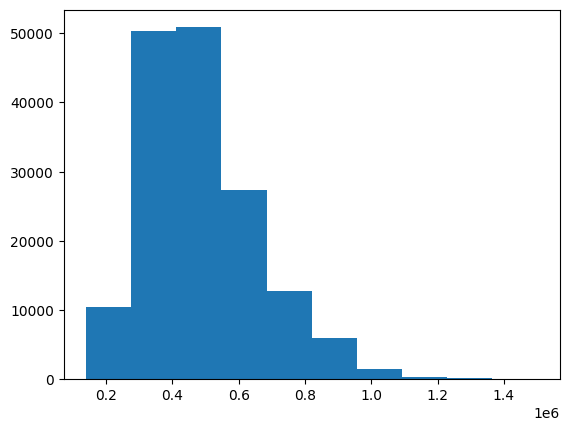

In [8]:
import matplotlib.pyplot as plt

plt.hist(df["resale_price"])

I noticed that for the top 25 largest loss, all of their original resale_price seem to be above 600k. As such, I have decided to plot a histogram of all the original df's resale_price. Here we can observe that from 600k onwards, theres a large drop in the amount of data available. This could have resulted in the model being unable to train well to predict the resale_prices of those houses above 600k.

In order to improve this, there definitely has to be more data points for houses with higher resale prices. In addition, I believe an additional step of preprocessing the resale prices could help to scale it and reduce the difference between each observation.